In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE

## Data Loading

In [39]:
account = pd.read_csv(r"C:\Users\Muslim Aqeel\Desktop\DS Task\Fraud Detection\Data\Customer Profiles\account_activity.csv")
customer = pd.read_csv(r"C:\Users\Muslim Aqeel\Desktop\DS Task\Fraud Detection\Data\Customer Profiles\customer_data.csv")
fraud = pd.read_csv(r"C:\Users\Muslim Aqeel\Desktop\DS Task\Fraud Detection\Data\Fraudulent Patterns\fraud_indicators.csv")
suspision = pd.read_csv(r"C:\Users\Muslim Aqeel\Desktop\DS Task\Fraud Detection\Data\Fraudulent Patterns\suspicious_activity.csv")
merchant = pd.read_csv(r"C:\Users\Muslim Aqeel\Desktop\DS Task\Fraud Detection\Data\Merchant Information\merchant_data.csv")
tran_cat = pd.read_csv(r"C:\Users\Muslim Aqeel\Desktop\DS Task\Fraud Detection\Data\Merchant Information\transaction_category_labels.csv")
amount = pd.read_csv(r"C:\Users\Muslim Aqeel\Desktop\DS Task\Fraud Detection\Data\Transaction Amounts\amount_data.csv")
anamoly = pd.read_csv(r"C:\Users\Muslim Aqeel\Desktop\DS Task\Fraud Detection\Data\Transaction Amounts\anomaly_scores.csv")
tran_data = pd.read_csv(r"C:\Users\Muslim Aqeel\Desktop\DS Task\Fraud Detection\Data\Transaction Data\transaction_metadata.csv")
tran_rec = pd.read_csv(r"C:\Users\Muslim Aqeel\Desktop\DS Task\Fraud Detection\Data\Transaction Data\transaction_records.csv")

In [40]:
df = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]

In [41]:
for d in df:
    print(d.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [42]:
costumer_data = pd.merge(customer, account, on='CustomerID')
costumer_data = pd.merge(costumer_data, suspision, on='CustomerID')
costumer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [43]:
transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")
transaction_data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928


In [44]:
df = pd.merge(transaction_data, costumer_data,on="CustomerID")
df

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796,Customer 1796,33,Address 1796,5588.049942,2024-03-06,0
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946,Customer 1946,18,Address 1946,7324.785332,2024-08-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411,Customer 1411,19,Address 1411,1290.323059,2023-02-15,0
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566,Customer 1566,39,Address 1566,7067.831609,2023-07-20,0
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654,Customer 1654,51,Address 1654,9088.738359,2023-10-16,0
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928,Customer 1928,60,Address 1928,9352.655675,2024-07-16,0


## Exploratory Data Analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1000 non-null   int64  
 1   FraudIndicator     1000 non-null   int64  
 2   Category           1000 non-null   object 
 3   TransactionAmount  1000 non-null   float64
 4   AnomalyScore       1000 non-null   float64
 5   Timestamp          1000 non-null   object 
 6   MerchantID         1000 non-null   int64  
 7   Amount             1000 non-null   float64
 8   CustomerID         1000 non-null   int64  
 9   Name               1000 non-null   object 
 10  Age                1000 non-null   int64  
 11  Address            1000 non-null   object 
 12  AccountBalance     1000 non-null   float64
 13  LastLogin          1000 non-null   object 
 14  SuspiciousFlag     1000 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 117.3+ KB


In [46]:
df.shape

(1000, 15)

In [47]:
df.describe()

,TransactionID,FraudIndicator,TransactionAmount,AnomalyScore,MerchantID,Amount,CustomerID,Age,AccountBalance,SuspiciousFlag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.045000,55.853826,0.492282,2504.701000,55.394871,1496.626000,39.848000,5715.455931,0.025000
std,288.819436,0.207408,26.093606,0.288423,288.414883,25.070809,289.229047,13.074932,2540.517262,0.156203
min,1.000000,0.000000,10.057864,0.000234,2001.000000,10.006933,1001.000000,18.000000,1056.301181,0.000000
25%,250.750000,0.000000,33.875129,0.251802,2254.500000,34.502315,1239.000000,29.000000,3489.554711,0.000000
50%,500.500000,0.000000,55.958313,0.490242,2500.500000,57.844325,1501.000000,39.000000,5753.007775,0.000000
75%,750.250000,0.000000,77.589391,0.741888,2761.250000,75.858576,1739.250000,51.000000,7925.710167,0.000000
max,1000.000000,1.000000,99.784323,0.999047,3000.000000,99.887410,2000.000000,64.000000,9999.776239,1.000000


In [48]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['TransactionID', 'FraudIndicator', 'TransactionAmount', 'AnomalyScore', 'MerchantID', 'Amount', 'CustomerID', 'Age', 'AccountBalance', 'SuspiciousFlag']
['Category', 'Timestamp', 'Name', 'Address', 'LastLogin']


## Generating Count Plots for Top 10 Values in Categorical Columns

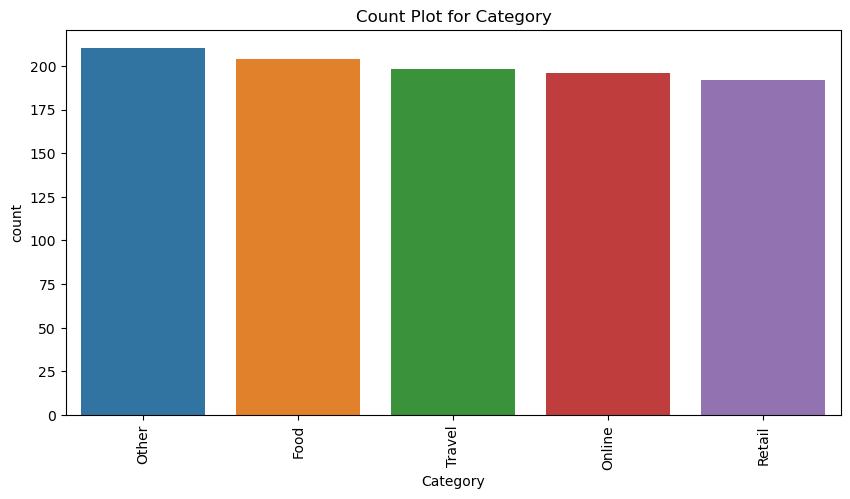

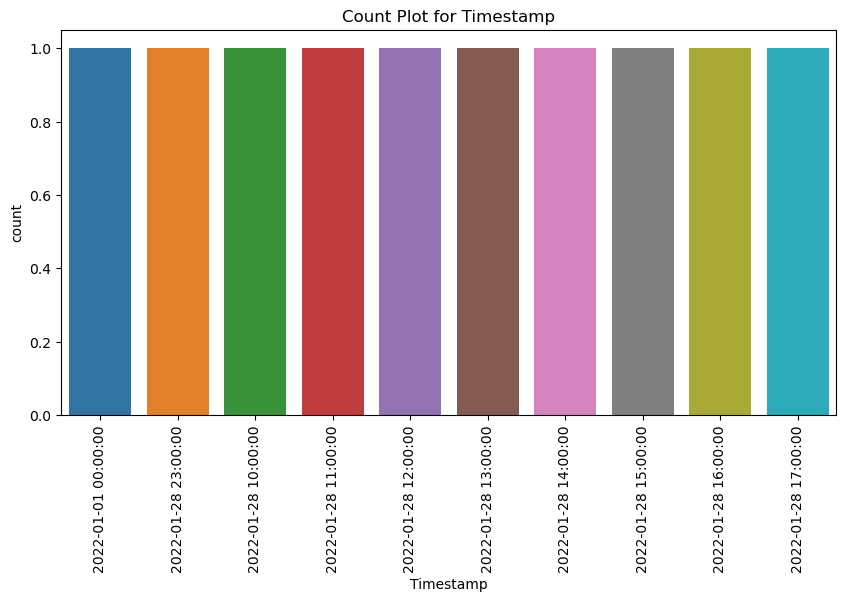

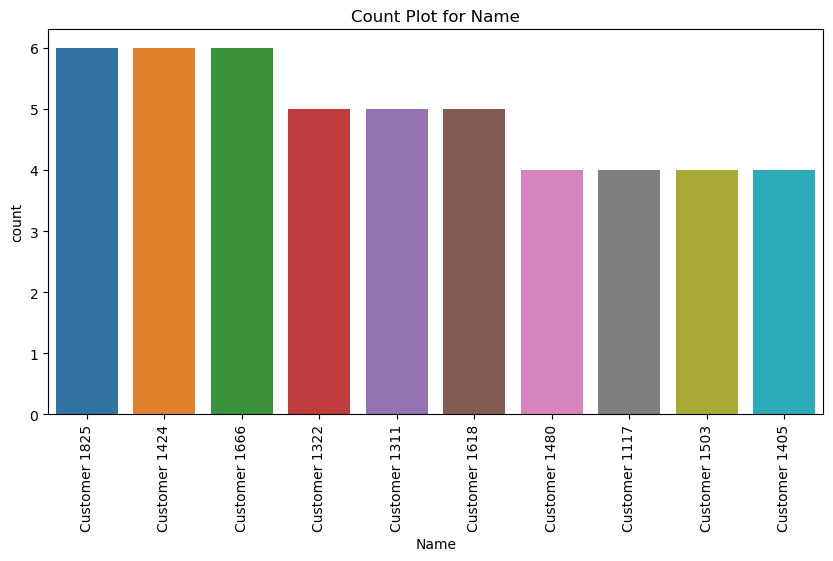

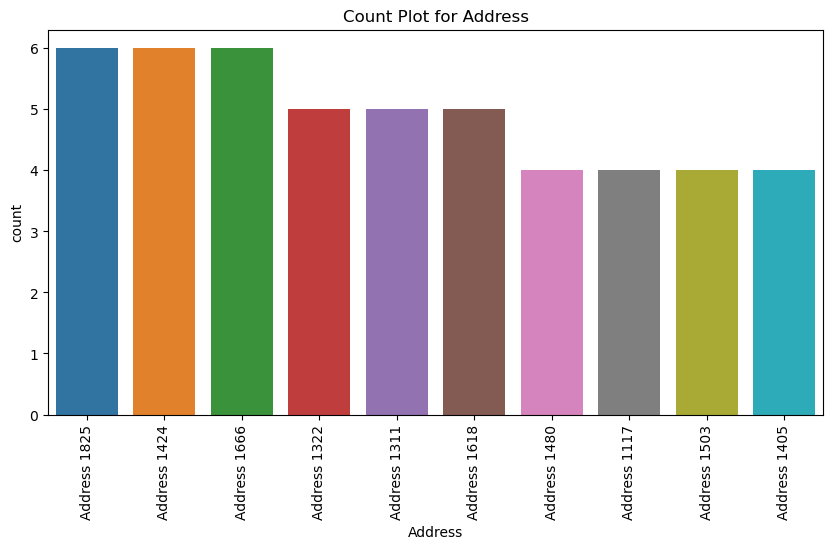

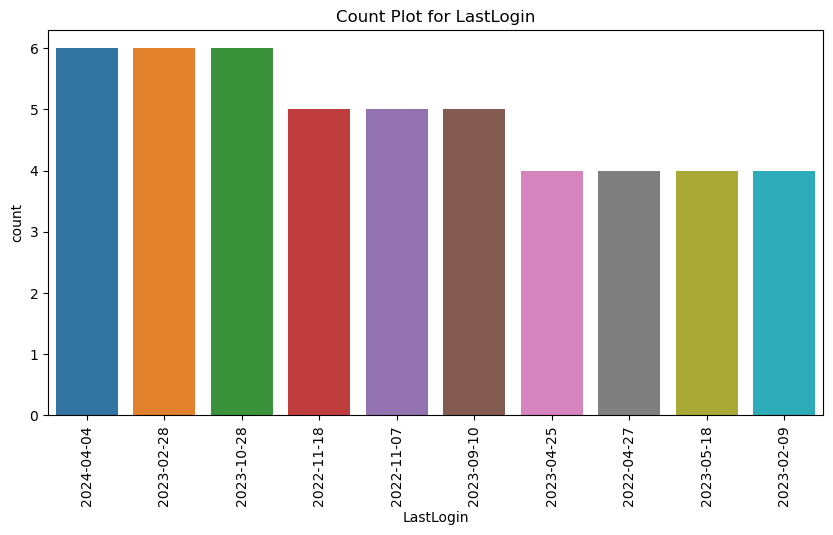

In [49]:
for column in df.columns:
    if df[column].dtype == 'object':  
        top_10_values = df[column].value_counts().head(10)  
        plt.figure(figsize=(10, 5))  
        sns.countplot(x=column, data=df, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  
        plt.show()

## Visualizing Distribution of Numerical Columns with Box Plots

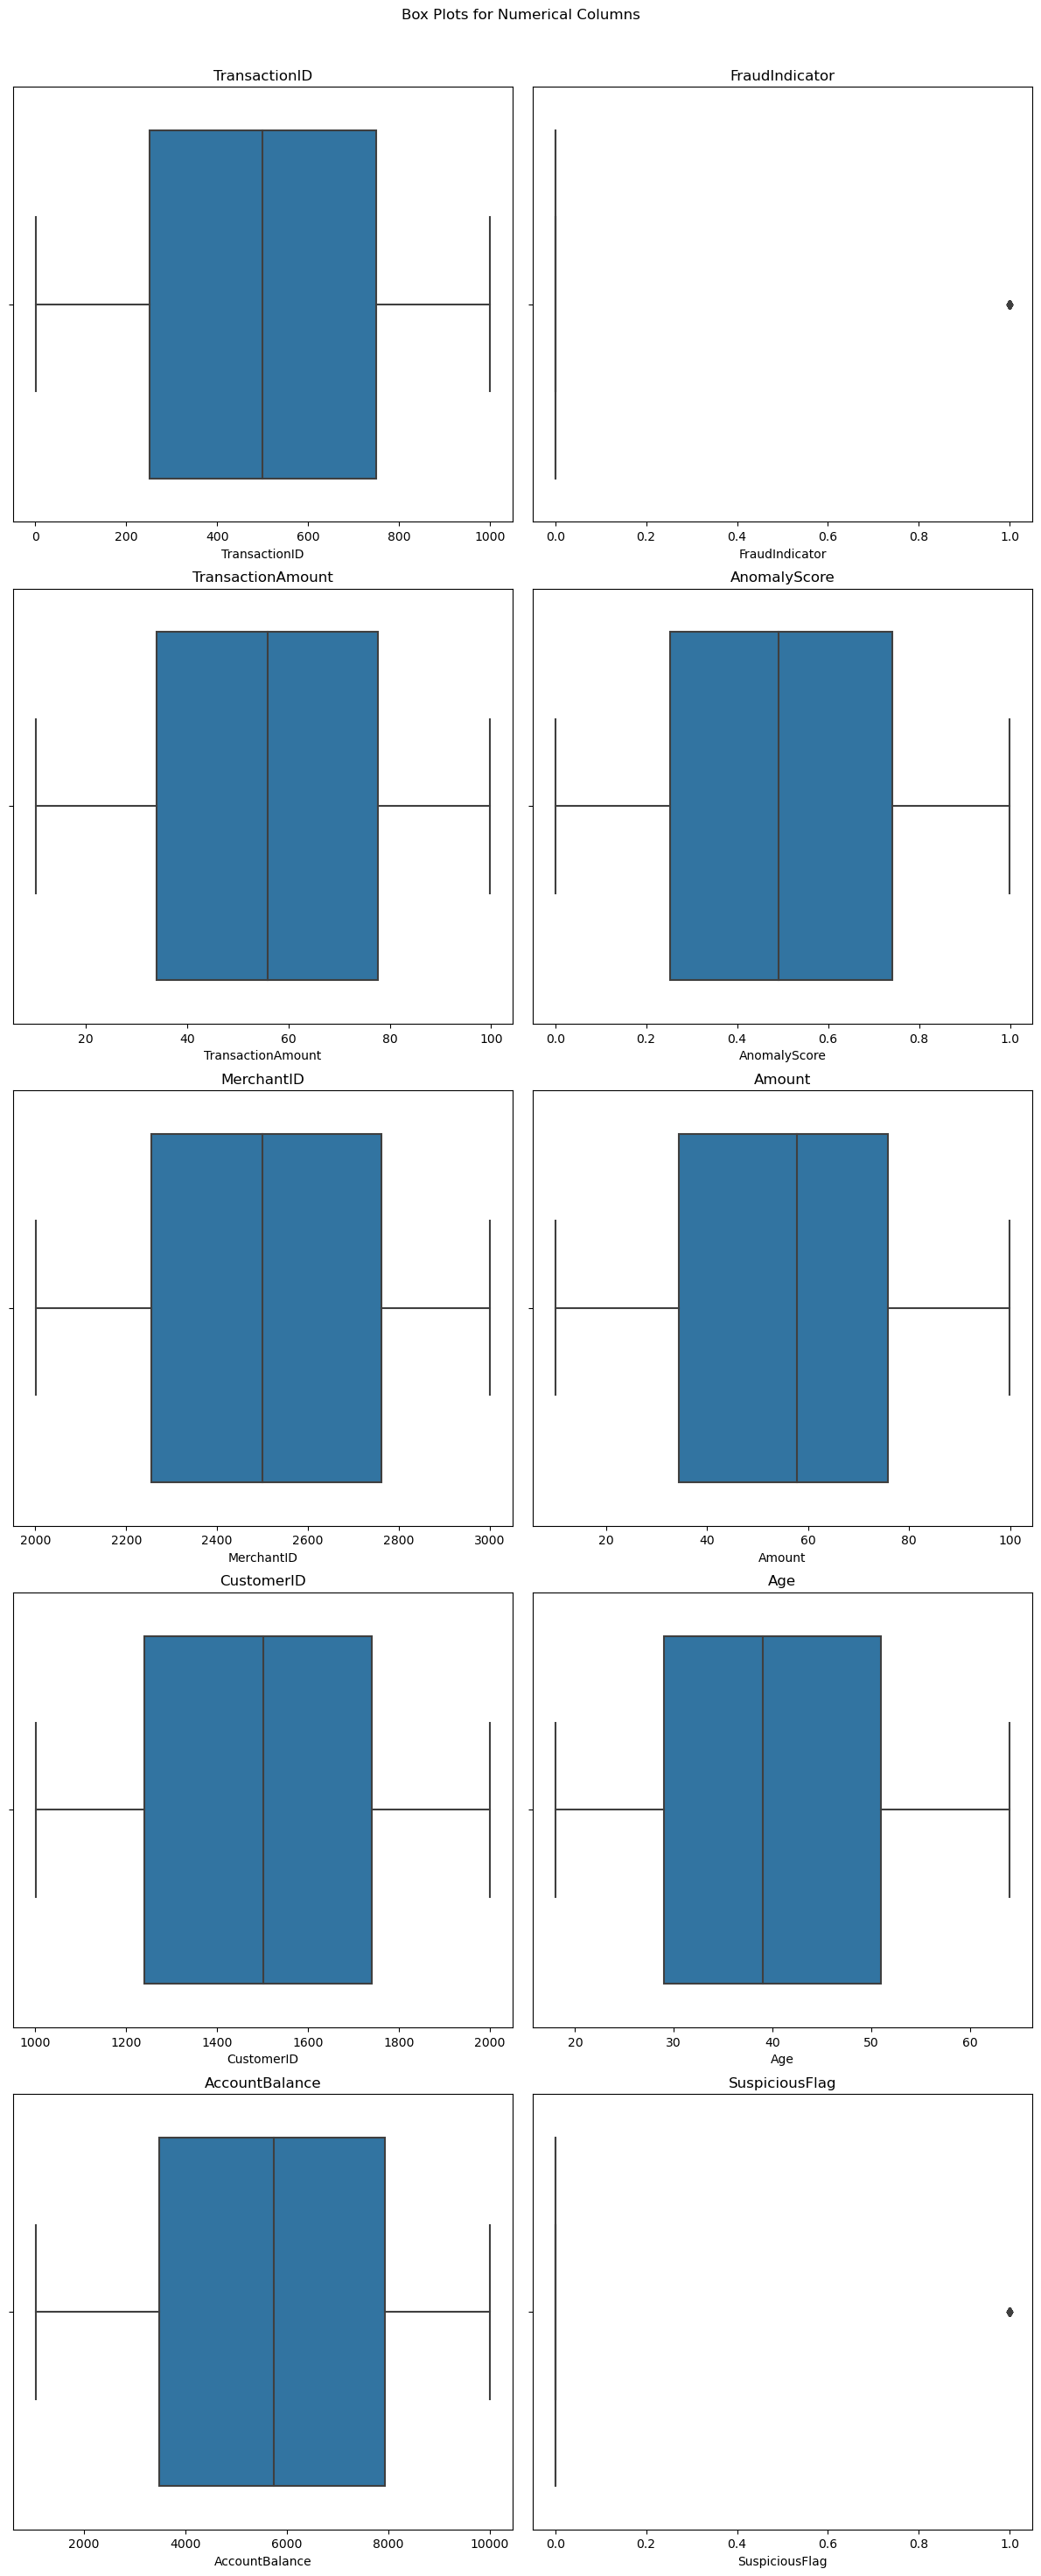

In [50]:
num_cols = len(df.select_dtypes(include=['number']).columns)
num_rows = (num_cols // 2) + (num_cols % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(column)

if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95) 
plt.show()


## Count Plot for Suspicious Flag Distribution

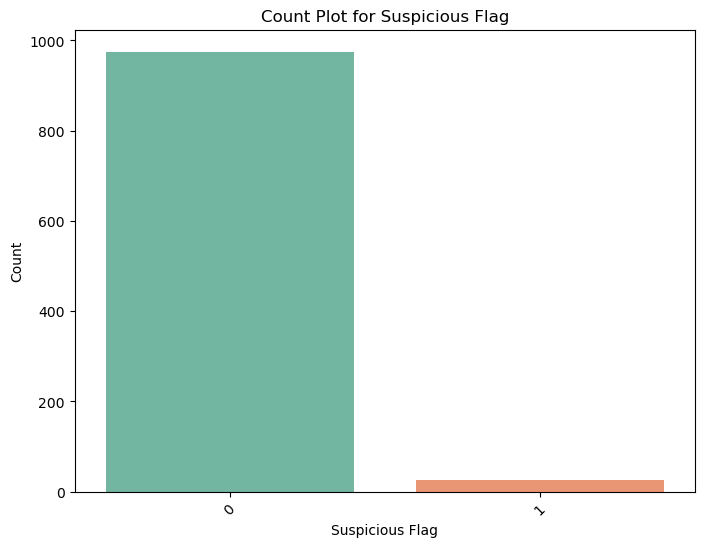

In [51]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='SuspiciousFlag', data=df, palette='Set2')
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45) 

plt.show()

## Correlation Heatmap for Numeric Columns

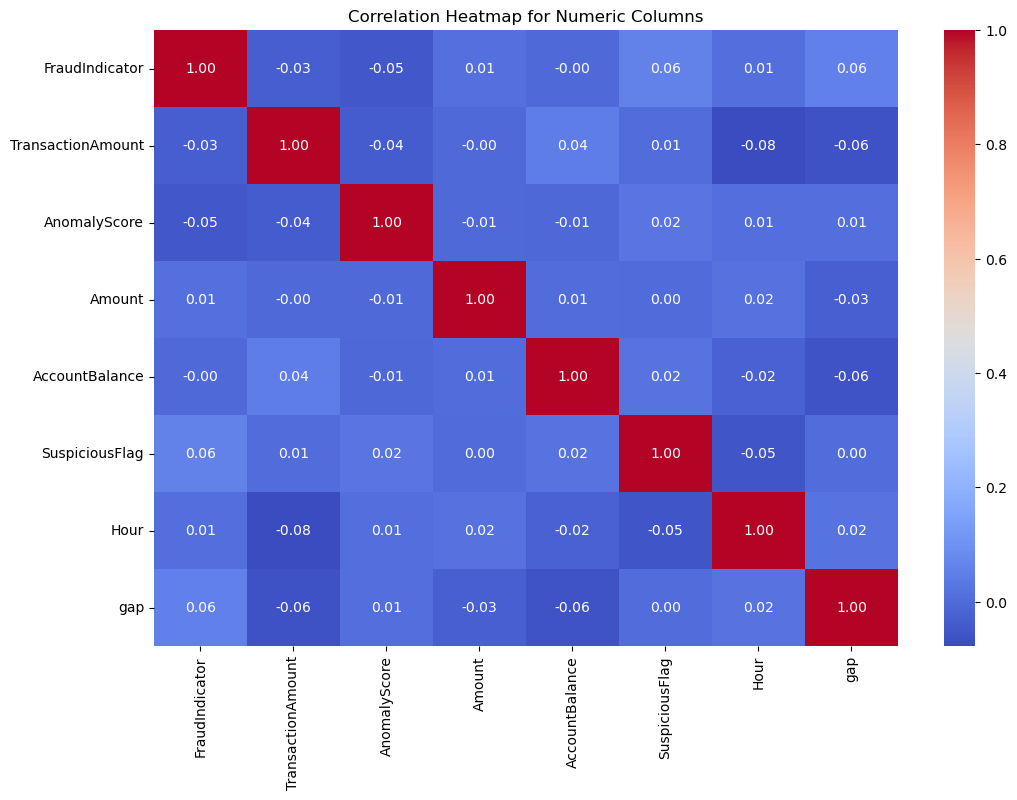

In [69]:
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()

## Data Preprocessing

In [54]:
columns_to_be_dropped = ['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']

In [55]:
df = df.drop(columns=columns_to_be_dropped, axis=1, errors='ignore')


In [56]:
df['FraudIndicator'].value_counts(), df['SuspiciousFlag'].value_counts(), df['Category'].value_counts()


(FraudIndicator
 0    955
 1     45
 Name: count, dtype: int64,
 SuspiciousFlag
 0    975
 1     25
 Name: count, dtype: int64,
 Category
 Other     210
 Food      204
 Travel    198
 Online    196
 Retail    192
 Name: count, dtype: int64)

In [57]:
if pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
    print("The 'Timestamp' column is already in datetime format.")
else:
    print("The 'Timestamp' column is not in datetime format.")

The 'Timestamp' column is not in datetime format.


In [58]:
df['Timestamp1'] = pd.to_datetime(df['Timestamp'])

print(df.dtypes)

FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


In [59]:
df['Hour'] = df['Timestamp1'].dt.hour

In [60]:
df['LastLogin'] = pd.to_datetime(df['LastLogin'])

In [61]:
df['gap'] = (df['Timestamp1'] - df['LastLogin']).dt.days.abs()

In [62]:
df.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,Hour,gap
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0,2022-01-01 00:00:00,0,951
1,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0,2022-01-01 01:00:00,1,26
2,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0,2022-01-01 02:00:00,2,954
3,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,41.634001,5588.049942,2024-03-06,0,2022-01-01 03:00:00,3,795
4,0,Other,54.051618,0.034059,2022-01-01 04:00:00,78.122853,7324.785332,2024-08-03,0,2022-01-01 04:00:00,4,945


In [63]:
X = df.drop(['FraudIndicator','Timestamp','Timestamp1','LastLogin'],axis=1)
y = df['FraudIndicator']

In [64]:
label_encoder = LabelEncoder()
X['Category'] = label_encoder.fit_transform(X['Category'])
X

,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag,Hour,gap
0,2,79.413607,0.686699,55.530334,2869.689912,0,0,951
1,1,12.053087,0.081749,12.881180,9527.947107,0,1,26
2,4,33.310357,0.023857,50.176322,9288.355525,0,2,954
3,4,46.121117,0.876994,41.634001,5588.049942,0,3,795
4,2,54.051618,0.034059,78.122853,7324.785332,0,4,945
...,...,...,...,...,...,...,...,...
995,0,89.457059,0.266778,19.876750,1290.323059,0,11,369
996,3,47.958030,0.512483,96.299792,7067.831609,0,12,524
997,0,64.210046,0.367740,75.164459,9088.738359,0,13,612
998,4,64.684167,0.960364,93.633040,9352.655675,0,14,886


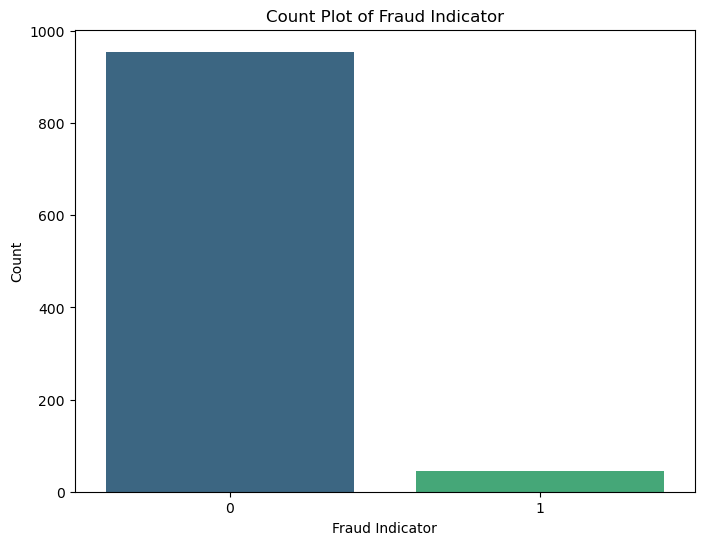

In [65]:
plt.figure(figsize=(8, 6))  
sns.countplot(data=df, x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

Class distribution after oversampling: Counter({0: 955, 1: 955})


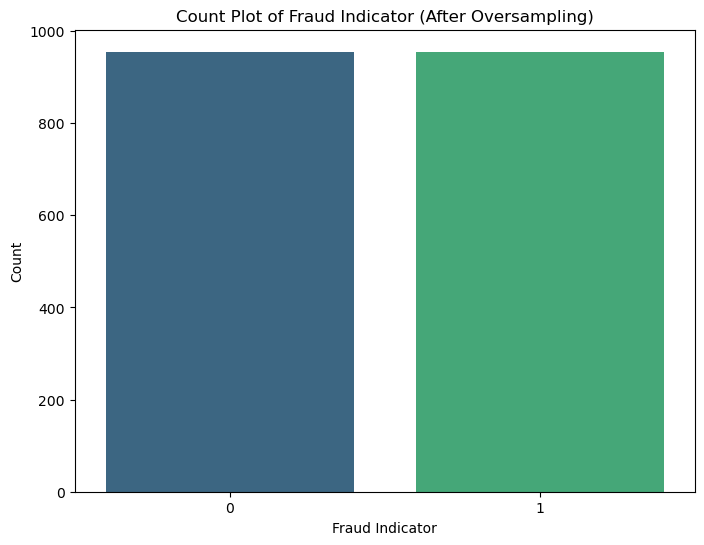

In [66]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class distribution after oversampling:", Counter(y_resampled))

plt.figure(figsize=(8, 6))
sns.countplot(data=pd.DataFrame({'FraudIndicator': y_resampled}), x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator (After Oversampling)')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

## Predictive Modelling Using Random Forest Regressor

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,y_test.shape
RandomForest= RandomForestClassifier(random_state=42)
model=RandomForest.fit(X_train,y_train)
y_pred= y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [68]:
model.score(X_test,y_test)

0.945